![MA_00079563_yvu84f.jpg](attachment:MA_00079563_yvu84f.jpg)

# 1. Introduction

# 2. Domain information
[Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) was a British passenger liner operated by the White Star Line. Titanic was on its way from Southampton to New York City when it sank in the North Atlantic Ocean in the early morning hours of **15 April 1912** after Titanic collided with an iceberg. The ship carried **2224** people, considering passengers and crew aboard,**1514** of them died.  

Titanic carried 16 wooden lifeboats and four collapsibles, which could accommodate 1,178 people, only one-third of Titanic's total capacity (and 53% of real number of passengers). At the time, lifeboats were intended to ferry survivors from a sinking ship to a rescuing ship—not keep afloat the whole population or power them to shore. If the SS Californian would responded to Titanic's distress calls, the lifeboats may have been adequate to ferry the passengers to safety as planned, but it didn't happen and the only way to survive were to get on the lifeboat.

The main question of the competition is **“what sorts of people were more likely to survive?”**

# 3. Loading libraries: 

List of libraries I am using in this kernel:
* pandas - offers data structures and operations for manipulating numerical tables and time series. (imported as pd) [Documentation](https://pandas.pydata.org/)
* seaborn - data visualization library based on matplotlib. [Documentation](https://seaborn.pydata.org/)
* matplotlib.pyplot - to create some visualizations (imported as plt) [Documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)
* numpy - The fundamental package for scientific computing with Python. [Documentation](https://numpy.org/)

In [ ]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 4. Loading data
As input information I have two CSV files:

* **train.csv** - training part of the dataset, contains labels and information about passengers.
* **test.csv** - testing part of the dataset, doesn't contain labels.

In this notebook I will use all available information (train + test datasets) to perform exploratory data analysis.  

1. First, load both csv files into two DataFrames, using pandas read_csv method and check the shape of the loaded data:

In [ ]:
train_data = pd.read_csv('train.csv')
# train_data = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/Data-Science-Advanced-Datasets/main/train.csv')
test_data = pd.read_csv('test.csv')
# test_data = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/Data-Science-Advanced-Datasets/main/test.csv')
print("Train shape:",train_data.shape)
print("Test shape:",test_data.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
all_data = pd.concat([train_data, test_data])
print("All data shape:",all_data.shape)

all_data.head()

All data shape: (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 5. First look: variables, NAs 
## 5.1 Variables
From the data overview of the competition, we have a description of each variable:
* PassengerId - unique identifier
* Survived:
        0 = No
        1 = Yes
* Pclass: Ticket class
        1 = 1st, Upper
        2 = 2nd, Middle
        3 = 3rd, Lower
* Name: full name with a title
* Sex: gender
* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* Sibsp: Number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:
        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: Number of parents / children aboard the Titanic. The dataset defines family relations in this way:
        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number.
* Fare: Passenger fare.
* Cabin: Cabin number.
* Embarked: Port of Embarkation:
        C = Cherbourg
        Q = Queenstown
        S = Southampton

## 5.2 Types of the variables

Data types, non-null values count:

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


Age and Fare are continuous numeric variables.  
Pclass is integer, but in fact it is categorical variable, represented by 3 numbers.  
After previous manipulations, Survived variable has type 'float', it's not correct, since it's categorical variable too, but it will not influence my EDA process, so I will let it be float for now.


## 5.3 Check data for NA
To check the dataset for NAs I am using **isna()** dataframe function, which returns a boolean same-sized object indicating if the values are NA and then I am calculating the number of True values for each variable.   
NA values for each dataframe (train, test, all) presented in the table below:

In [ ]:
# check data for NA values
all_data_NA = all_data.isna().sum()
train_NA = train_data.isna().sum()
test_NA = test_data.isna().sum()

pd.concat([train_NA, test_NA, all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])

,Train NA,Test NA,All NA
PassengerId,0,0.0,0
Survived,0,NaN,418
Pclass,0,0.0,0
Name,0,0.0,0
Sex,0,0.0,0
Age,177,86.0,263
SibSp,0,0.0,0
Parch,0,0.0,0
Ticket,0,0.0,0
Fare,0,1.0,1


# 6. Exploring the data

## 6.1 Survivals - target value
Let's calculate and visualise distribution of our target variable - 'Survived'.  
A countplot of seaborn module is a very useful way to show the counts of observations in each category.  
Since we have target only for the training part, these numbers don't include all passengers.

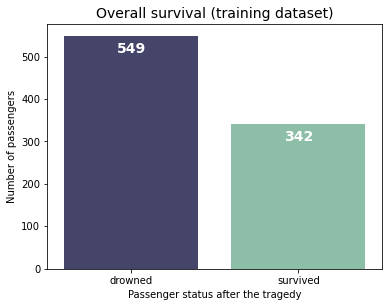

In [ ]:
# set size of the plot
plt.figure(figsize=(6, 4.5)) 

# countplot shows the counts of observations in each categorical bin using bars.
# x - name of the categorical variable
ax = sns.countplot(x = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"])

# set the current tick locations and labels of the x-axis.
plt.xticks( np.arange(2), ['drowned', 'survived'] )
# set title
plt.title('Overall survival (training dataset)',fontsize= 14)
# set x label
plt.xlabel('Passenger status after the tragedy')
# set y label
plt.ylabel('Number of passengers')

# Calculate passenger count for each category
labels = (all_data['Survived'].value_counts())
for i,v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment='center', size=14, color='w', fontweight='bold')
    
plt.show();

In [ ]:
(all_data['Survived'].value_counts())

0.0    549
1.0    342
Name: Survived, dtype: int64

In [ ]:
all_data['Survived'].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

We have 891 passengers in our train data.

549 i.e. 61.61% of them drowned.

342 i.e. 38.38% of them Survived.

## 6.2 AGE
What is the age of passengers, how it relates to the chances of survival, and how it changes depending on class and gender.
### 6.2.1 Age distribution
We have 263 missing values:  
* 177 missing in the training dataset 
* 86 in the test dataset

Overall age distribution (seaborn distplot) and descriptive statistics:

In [ ]:
# Your code goes here8



In [ ]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
age_distr = pd.DataFrame(all_data['Age'].describe())
# Transpose index and columns.
age_distr.transpose()

### 6.2.2 Age by surviving status
Did age had a big influence on chances to survive?  
To visualize two age distributions, grouped by surviving status I am using boxlot and stripplot showed together:

In [ ]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = train_data,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = train_data,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

In [ ]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Survived')['Age'].describe())

In [ ]:
# Your code goes here12



In [ ]:
train_data.loc[train_data['PassengerId'] == 631, 'Age'] = 48
all_data.loc[all_data['PassengerId'] == 631, 'Age'] = 48

In [ ]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Survived')['Age'].describe())

Let's update our description:  
The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for).=
The maximum age of survived passenger is 63 y.o.  
It looks like there is a slightly bigger chance to survive for younger people.

### 6.2.3 Age by class
There I will compare three age distributions, grouped by class of the passenger.  
As visualisations I will use 2 gaphs:
1. boxplot+stripplot as before
2. kdeplot, to plot age density curves for each class. This method can't handle missing values, so I filter the data before using it.

In [ ]:
# set size
plt.figure(figsize=(20, 6))

# set palette
palette = sns.cubehelix_palette(5, start = 3)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Pclass', y = 'Age', data = all_data,
     palette = palette, fliersize = 0)

sns.stripplot(x = 'Pclass', y = 'Age', data = all_data,
     linewidth = 0.6, palette = palette)
plt.xticks( np.arange(3), ['1st class', '2nd class', '3rd class'])
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Ticket class')


# Your code goes here15



# Ploting the 3 variables that we create
sns.kdeplot(age_1_class["Age"], shade=True, color='#eed4d0', label = '1st class')
sns.kdeplot(age_2_class["Age"], shade=True,  color='#cda0aa', label = '2nd class')
sns.kdeplot(age_3_class["Age"], shade=True,color='#a2708e', label = '3rd class')
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

In [ ]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Pclass')['Age'].describe())

### 6.2.4 Age vs class vs gender
Comparison of age distribution by gender I will do separately for each class since we have such a noticeable age difference between classes.

In [ ]:
plt.figure(figsize=(20, 5))
palette = "Set3"

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Sex', y = 'Age', data = age_1_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_1_class,
     linewidth = 0.6, palette = palette)
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Sex', y = 'Age', data = age_2_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_2_class,
     linewidth = 0.6, palette = palette)
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Sex', y = 'Age',  data = age_3_class,
     order = ['female', 'male'], palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_3_class,
     order = ['female', 'male'], linewidth = 0.6, palette = palette)
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.show()

In [ ]:
# Your code goes here18



pd.concat([age_1_class_stat, age_2_class_stat, age_3_class_stat], axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

## 6.3 What is in the name? 
Each passenger Name value contains the title of the passenger which we can extract and discover.  
To create new variable "Title":  
1. I am using method 'split' by comma to divide Name in two parts and save the second part
2. I am splitting saved part by dot and save first part of the result
3. To remove spaces around the title I am using 'split' method

To visualize, how many passengers hold each title, I chose countplot.

In [ ]:
all_data['Title'] = all_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')

plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Title', data = all_data, palette = "hls", order = all_data['Title'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Title'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()


The most frequent title among passangers is Mister (Mr.) - general title or respect of an adult male. The second title by its frequency is Miss (unmarried woman), the third - Mrs. (married woman).  
Other titles are less frequent, I will discover if I can combine them into particular groups. I am going to use titles as a fiture, but if they split the data too much, leaving just a few observations in each group, it can lead to overfitting. And for a general understanding of the data, it will be more convenient to put titles in clearer groups.

* Master -  By the late 19th century, etiquette dictated that men be addressed as Mister, and boys as Master.
* Mme -  Madame. a French title of respect equivalent to “Mrs.”, used alone or prefixed to a woman's married name or title. I will add to "Mrs".
* Mlle - Mademoiselle is a French courtesy title, abbreviated Mlle, traditionally given to an unmarried woman. The equivalent in English is "Miss". I will add to "Miss" group.
* Dr. - Doctor is an academic title
* Rev. - Reverend, is usually a courtesy title for Protestant Christian ministers or pastors.

"Military" group of titles:
* Capt. -Captain is a title for the commander of a military unit
* Major is a military rank of commissioned officer status
* Col. - The honorary title of Colonel is conferred by several states in the US and certain military units of the Commonwealth of Nations

"Honor"  group of titles:
* Sir -  is a formal English honorific address for men. Sir is used for men titled knights i.e. of orders of chivalry, and later also to baronets, and other offices. 
* the Countess - is a historical title of nobility
* Lady - a formal title in the United Kingdom. A woman with a title of nobility or honorary 
* Jonkheer - is an honorific in the Low Countries denoting the lowest rank within the nobility. 
* Don - is an honorific prefix primarily used in Spain and the former Spanish Empire, Italy, Portugal, the Philippines, Latin America, Croatia, and Goa. (male)
* Dona - Feminine form for don (honorific) a Spanish, Portuguese, southern Italian, and Filipino title, given as a mark of respect


Not sure about the title Ms,we have only 2 passengers with this title, I will convert it to Miss.

I created a dictionary of titles and I am using method "map" to create variable "Title_category".

In [ ]:
all_data[all_data['Title']=='Ms']

In [ ]:
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',

                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',

                'Dr':     'Dr',
                'Rev':    'Rev',
                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

# map titles to category
all_data['Title_category'] = all_data['Title'].map(title_dict)

In [ ]:
fig = plt.figure(figsize=(12, 5))


ax1 = fig.add_subplot(121)
ax = sns.countplot(x = 'Title_category', data = all_data, palette = "hls", order = 
                   all_data['Title_category'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Passengers distribution by titles',fontsize= 12)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Title_category'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()

ax2 = fig.add_subplot(122)
surv_by_title_cat = all_data.groupby('Title_category')['Survived'].value_counts(normalize = True).unstack()
surv_by_title_cat = surv_by_title_cat.sort_values(by=1, ascending = False)
surv_by_title_cat.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)

plt.legend( ( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)


plt.title('Proportion of survived/drowned by titles (train data)',fontsize= 12)

plt.tight_layout()
plt.show()

In [ ]:
# Your code goes here23



In [ ]:
class_by_title_cat = all_data.groupby('Title_category')['Pclass'].value_counts(normalize = True)
class_by_title_cat = class_by_title_cat.unstack().sort_values(by = 1, ascending = False)
class_by_title_cat.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'])
plt.legend(loc=(1.04,0))
_ = plt.xticks(
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light'  
)


plt.title('Proportion of 1st/2nd/3rd ticket class in each title category',fontsize= 14)
plt.xlabel('Category of the Title')
plt.tight_layout()

## 6.4 Cabin
![Titanic_cutaway_diagram-small.png](attachment:Titanic_cutaway_diagram-small.png)

From the number of the cabin we can extract first letter, which will tell us about placement of the cabin on the ship! And it seems to me as a very important knowlege:   
* How close cabin located to the lifeboats
* How far from the most damaged parts of the ship
* How close to people who have information about what is happening and how to act
* How many obstacles passenger had in the way to the lifeboat

I found some description of each Titanic deck:

There were 8 decks: the upperdeck - for lifeboats, other 7 were under it and had letter symbols:
* **A**: it did not run the entire length of the vessel (i.e. it did not reach from the stern to the bow of the vessel), and was intended for passengers of the **1st class**.
* **B**: it did not run the entire length of the ship (it was interrupted by 37 meters above the C deck, and served as a place for anchors in the front).
* **C**: in the front part of the galley, dining room for the crew, as well as a walking area for passengers of the 3rd class.
* **D**: a walking area for passengers .
* **E**: cabins of the **1st and 2nd class**.
* **F**: part of the passenger cabins of the **2nd class**, most of the cabins of the **3rd class**.
* **G**: did not run the entire length of the ship, the boiler rooms were located in the center.
* **T** - boat deck ?

To the passengers without deck information I will imput U letter (as unknown).

In [ ]:
all_data['deck'] = all_data['Cabin'].str.split('', expand = True)[1]
all_data.loc[all_data['deck'].isna(), 'deck'] = 'U'
print('Unique deck letters from the cabin numbers:', all_data['deck'].unique())

In [ ]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
sns.countplot(x = 'deck', data = all_data, palette = "hls", order = all_data['deck'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(132)
deck_by_class = all_data.groupby('deck')['Pclass'].value_counts(normalize = True).unstack()
deck_by_class.plot(kind='bar', stacked='True',color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of classes on each deck',fontsize= 16)
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
deck_by_survived = all_data.groupby('deck')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()


In [ ]:
all_data[(all_data['deck']=='A') & (all_data['Survived']==0)]

I was curious, so I read a bit about some of these passengers:  
[John Hugo Ross](https://www.encyclopedia-titanica.org/titanic-victim/john-hugo-ross.html) When he boarded on 10 April 1912, he was so ill from dysentery he had to be carried to his cabin on a stretcher. When Ross was told the ship had struck an iceberg and that he should get dressed, Ross refused to believe the trouble serious. "Is that all,?" he told Peuchen. "It will take more than an iceberg to get me off this ship." Presumably, Ross drowned in his bed.  

[Andrews, Mr. Thomas Jr](https://en.wikipedia.org/wiki/Thomas_Andrews) was a managing director of H&W (built the Titanic) in charge of designing and was familiar with every detail of the construction of the firm's ships. He helped to evacuate people.

[Roebling, Mr. Washington Augustus II ](https://www.encyclopedia-titanica.org/titanic-victim/washington-roebling.html) helped to evacuate people as well.

It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergensy were involved in the rescue process.

For training process it will be better to include passenger from T deck to the A deck group.

## 6.5 Family
Does the size of the family on Board together affect the chances of surviving a disaster? Does having children increase the chance of getting into a boat, or is it easier to survive being single?  
I calculate the family size, by summarizing the number of siblings with the parch number  plus 1 (passenger himself).  
Family size = sib + parch + 1

### 6.5.1 Calculate family size

In [ ]:
# Your code goes here28



In [ ]:
# Your code goes here29



In [ ]:
# Your code goes here30



In [ ]:
# Your code goes here31



2. Let's group Andersons with 7-size family by ticket number.  
There are  7 of them used the same ticket and travelled together. 5 children (each of them has 4 siblings) and 2 parents.
To passengers used separated tickets.

In [ ]:
all_data[(all_data['Family_size'] == 7) & (all_data['Surname']=='Andersson')].Ticket.value_counts()

In [ ]:
all_data[(all_data['Ticket'] == '3101281') | (all_data['Ticket'] == '347091')]

Looks like they actually traveled alone, I will correct that data.

In [ ]:
all_data.loc[all_data['PassengerId'] == 69, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
all_data.loc[all_data['PassengerId'] == 1106, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
all_data[(all_data['Ticket'] == '3101281') | (all_data['Ticket'] == '347091')]

#### size 5
There are some inconsistencies in other categories, with fewer relatives.  
Let's check people with 5-size family and group them by Surname:

In [ ]:
all_data[all_data['Family_size'] == 5]['Surname'].value_counts()

In [ ]:
all_data[(all_data['Surname'] == 'Kink-Heilmann')&(all_data['Family_size'] == 5)]

Kink-Heilmann, Mr. Anton	 had 2 other siblings on the ship unlike his wife, for whom these relatives do not fit the description of relatives in the data set. We will assume that all other "mismatches" in the groups are similar to this. Since I plan to group the size of families into groups, this will eliminate possible inconsistencies.

### 6.5.2 Family size and chanses for surviving

In [ ]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(all_data['Family_size'], ax = ax1)

# calculate passengers for each category
labels = (all_data['Family_size'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = all_data.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

In [ ]:
all_data['Family_size_group'] = all_data['Family_size'].map(lambda x: 'f_single' if x == 1 
                                                            else ('f_usual' if 5 > x >= 2 
                                                                  else ('f_big' if 8 > x >= 5 
                                                                       else 'f_large' )
                                                                 ))                                                       

In [ ]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(121)
d = all_data.groupby('Family_size_group')['Survived'].value_counts(normalize = True).unstack()
d = d.sort_values(by = 1, ascending = False)
d.plot(kind='bar', stacked='True', color = ["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Proportion of survived/drowned passengers by family size (training data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax2 = fig.add_subplot(122)
d2 = all_data.groupby('Family_size_group')['Pclass'].value_counts(normalize = True).unstack()
d2 = d2.sort_values(by = 1, ascending = False)
d2.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of 1st/2nd/3rd ticket class in family group size')
_ = plt.xticks(rotation=False)

plt.tight_layout()

## 6.6 Class
We have made a lot of assumptions about the survival rate depending on the classes. Let's now look closely at this variable.

### 6.6.1 Passengers by class

In [ ]:
ax = sns.countplot(all_data['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])
# calculate passengers for each category
labels = (all_data['Pclass'].value_counts(sort = False))
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')
plt.tight_layout()

### 6.6.2 Class vs surviving status

In [ ]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = all_data.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

### 6.6.3 Class vs surviving status vs gender

In [ ]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = all_data , palette=["#3f3e6fd1", "#85c6a9"])

plt.tight_layout()

### 6.6.4 Class vs. Gender vs. Age -> Surviving status 
For better understanding how the combination of some factors influence on chances to survive, lets break passengers into 18 imaginary groups separated by:
* **Class** (1 / 2 / 3)
* **Gender** (male / female)
* **Age** ( <16 / 16-40 / 40<)  

To do so I will create 6 stripplots (3 for male, 3 for female), with values grouped by Surviving status and add background color to separate age groups:

In [ ]:
plt.figure(figsize=(20, 10))
palette=["#3f3e6fd1", "#85c6a9"]

plt.subplot(2, 3, 1)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 3)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='male'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='female'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.show()

## 6.7 Gender
Let's discover gender a little bit more:

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot (1,3,1)
ax = sns.countplot(all_data['Sex'], palette="Set3")
plt.title('Number of passengers by Sex')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Sex'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.subplot (1,3,2)
sns.countplot( x = 'Pclass', data = all_data, hue = 'Sex', palette="Set3")
plt.title('Number of male/female passengers by class')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0))

# Your code goes here44



There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.  
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.

## 6.8 Embarked
Titanic had 3 embarkation points before the ship started its route to New York:
* Southampton
* Cherbourg
* Queenstown  

Some passengers could leave Titanic in Cherbourg or Queenstown and avoid catastrophe. Also, the point of embarkation could have an influence on ticket fare and location on the ship.  

![09269a9f7d50a3f019182a11f7aa7981.jpg](attachment:09269a9f7d50a3f019182a11f7aa7981.jpg)

Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [ ]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(all_data['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Embarked'].value_counts())
labels = labels.sort_index()
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

ax2 = fig.add_subplot(132)
surv_by_emb = all_data.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = all_data.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout()

In [ ]:

sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=all_data, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [ ]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Embarked')['Fare'].describe())

In [ ]:
train_data[train_data['Embarked'].isna()]

These two passengers traveled together (same ticket number). To impute missing values, we can use mode value for passengers with the closest fare value and Pclass.

## 6.9 Fare


In [ ]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=all_data, palette=sns.cubehelix_palette(5, start = 3), height = 6)

plt.tight_layout()

In [ ]:
# Your code goes here50



In [ ]:
all_data[all_data['Fare'] == min(all_data['Fare'])]

# 7. Conclusion
We know that there were not enough boats on Board the Titanic for all passengers to be able to evacuate. After studying the information about the passengers, we can make some assumptions about who had a better chance of survival in a shipwreck situation as well as General observations about passengers.

* There are 891 passengers in the train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived. But we know, that lifeboats (16 wooden lifeboats and four collapsible) could carry 53% of total passengers.
* The Age of all passengers vary from about 0.17 year to 80 years with average 29.88. The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for). It looks like there is a slightly bigger chance to survive for younger people.
* Exploring the title of passengers, we can see that the biggest proportion of survivors is in the "Mrs" group - a married woman. More than 80% drowned in the "Mr." group and nobody survived among the Reverend group.
* Most passengers don't have cabin numbers. The largest part of passengers with known cabin numbers was located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.  
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'. Deck A was the closest to the deck with lifeboats, but it is the last in the surviving rate.
* The family size on board also seems to have an influence on chances for survival: there were two large families with sizes 8 and 11 and all their members from the training dataset are drowned.  We can observe that the percentage of survivors in people who have a family of 2, 3, 4 people is greater than in singles, then the percentage of survivors decreases as the family size increases.  
* Most of the Titanic's passengers were traveling third class (709). The second class is the smallest in terms of the number of passengers. Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first-class has the largest number of survivors and the proportion of survivors within the class is the largest.  
Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.
* However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the females survived.  
There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.  
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.  
* Most numbers of passengers (914) were embarked in Southampton. Also, Southampton has the biggest proportion of drowned passengers. 270 passengers embarked in Cherbourg and more than 50% of them survived (in the training dataset). 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers.  

 
If we use a naive approach and consider all the parameters separately, then young female first-class passengers with the title Mrs have a moderate number of relatives on Board, who paid a large amount for a ticket and went on Board in  Cherbourg have a better chance of survival. 
For sure, there is a relationship between variables, and survival was influenced not only by the title, or ticket, or age itself but by a combination of factors that are to some extent interrelated.   
And It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergency were involved in the rescue process.

# 4. Handling missing values/ outliers/ mistakes


## 4.1. Mistakes, outliers
From my EDA we discovered some mistakes in data:
* Two passengers with ids 69 and 1106 have wrong number of SibSp and Parch.
* Passenger 631 has wrong age.

In [ ]:
# Passengers with wrong number of siblings and parch
train_data.loc[train_data['PassengerId'] == 69, ['SibSp', 'Parch']] = [0,0]
test_data.loc[test_data['PassengerId'] == 1106, ['SibSp', 'Parch']] = [0,0]

# Age outlier 
train_data.loc[train_data['PassengerId'] == 631, 'Age'] = 48

## 4.2. Missing values
Missing values can be caused by different reasons, there are three main [mechanisms](https://www.theanalysisfactor.com/missing-data-mechanism/):  
* **Missing Completely at Random** (MCAR) - there is no relationship between the missingness of the data and any values, observed or missing.
* **Missing at Random** (MAR) - there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.
* **Missing Not at Random**(MNAR) - there is a relationship between the propensity of a value to be missing and its values. 

Depending on reasons, why values are missing, we should act differently with data imputation. It's not easy to say for sure, what type of missing values we have, but we can do some assumptions.

For example, based on the fact that among the passengers without the specified cabin, the percentage of drowned is higher, you might think that the presence of this information tells us something (MAR). Cabin information is missing from a very large number of passengers (687 NA in training dataset and 327 in test dataset). I read about the [assumptions](https://www.encyclopedia-titanica.org/cabins.html) that this information was collected from the words of survived passengers. If this is the case, then the presence or absence of data is itself important information.  
To preserve a possible insight, we can add a separate flag that the passenger cabin is unknown. I use the cabin to determine the passenger's deck, for those who do not have the information, I will add the 'U' flag. I don't plan to use the cabin itself.  

Age can be a similar situation (there are bigger percent of passengers who survived among passengers with not NA Age), so I will add a flag that age is not specified ('Age_NA') before inserting the assumed values into the age variable.  

There are table of missing values:  

In [ ]:
# check data for NA values
train_NA = train_data.isna().sum()
test_NA = test_data.isna().sum()
pd.concat([train_NA, test_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA'])

Using sns.heatmap we can visualise missing values:

In [ ]:
plt.figure(figsize = (16, 7))

# Your code goes here55



plt.subplot(1,2,2)
sns.heatmap(test_data.isnull(), cbar=False)
plt.xticks(rotation=35,     horizontalalignment='right',
    fontweight='light'  )
plt.title('Test dataset missing values')

plt.tight_layout()

### 4.2.1 Age 
First, add Age_NA variable indicates that there is no age in the original data.  
Second, I will imput median Age calculated inside of each Pclass + Sex + Title_category group. To do so, I extracting Title from Name variable and map it on title category dictionary.


In [ ]:
# Add new variable Age_NA indicates that there is no age in the original data.
train_data.loc[train_data['Age'].isna(), 'Age_NA'] = 1     # 1 for missing Age value
train_data.loc[train_data['Age_NA'].isna(), 'Age_NA'] = 0  # 0 if Age value is not null
test_data.loc[test_data['Age'].isna(), 'Age_NA'] = 1       
test_data.loc[test_data['Age_NA'].isna(), 'Age_NA'] = 0

# titles categories dict
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',
                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',
                'Dr':     'Dr',
                'Rev':    'Rev',                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

# add title variable
train_data['Title'] = train_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
test_data['Title'] = test_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')

# map titles to category
train_data['Title_category'] = train_data['Title'].map(title_dict)
test_data['Title_category'] = test_data['Title'].map(title_dict)

# delete Title variable
del train_data['Title']
del test_data['Title']

# Filling the missing values in Age with the medians of Sex and Pclass, Title groups
train_data['Age'] = train_data.groupby(['Pclass', 'Sex', 'Title_category'])['Age'].apply(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby(['Pclass', 'Sex', 'Title_category'])['Age'].apply(lambda x: x.fillna(x.median()))

### 4.2.2 Embarked
There are two missing Embarked values. Both of the passengers are with ticket number = 113572 (and same cabin number), so they traveled together. I will imput values with mode value for same class passengers in similar fare group (77-82), because Fare should depend on class and duration of the trip (which depends on the place of boarding).

In [ ]:
train_data[train_data['Embarked'].isna()]

In [ ]:
mode_emb = train_data[(train_data['Fare'] > 77) & (train_data['Fare'] < 82)& (train_data['Pclass']==1)]['Embarked'].mode()
train_data.loc[train_data['Embarked'].isna(), 'Embarked'] = mode_emb[0]

### 4.2.3 Fare
Only one fare value is missed. I will fill NA with median Fare calculated inside of same  Pclass + Sex + Title_category + Parch group.

In [ ]:
# Filling the missing values in Age with the medians of Sex and Pclass, Title groups
test_data['Fare'] = test_data.groupby(['Pclass', 'Sex', 'Title_category', 'Parch'])['Fare'].apply(lambda x: x.fillna(x.median()))

# Happy Learning